In [244]:
from manual_orf import *
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('./../plotting.mplstyle')
from scipy.special import spherical_jn

c=2.998e8
R_earth = 6.371e6
blue="#1f78b4"
green="#33a02c"

## Goal:

Let's use this notebook to double-check that we understand the relationship between R/L modes, I/V modes, and the relevant overlap reduction functions.

**Right/Left**

The cross-correlation statistic between two instruments has expectation value

$$
\begin{aligned}
\langle \tilde s_1(f) \tilde s_2^*(f') \rangle
    &= \frac{1}{8\pi} \delta(f-f') \left[ 
        \mathcal{H}_R(f) \int d\hat n \,F_1^R(\hat n)\,{F_2^R}^*(\hat n)\,e^{-2\pi i f \Delta x\cdot \hat n/c} 
        + \mathcal{H}_L(f) \int d\hat n \,F_1^L(\hat n)\,{F_2^L}^*(\hat n)\,e^{-2\pi i f \Delta x\cdot \hat n/c} 
        \right]
\end{aligned}
$$

where

   * $\mathcal{H}_R(f)$ and $\mathcal{H}_L(f)$ quantify the strain power in right- and left-handed modes,
   * $\hat n$ is a unit vector varying over the sky,
   * $F_i^R(\hat n)$ and $F_i^L(\hat n)$ are the antenna patterns of detector $i$ to each polarization,
   * $\Delta x$ is the separation vector between instruments, and
   * $c$ is the speed of light
   
This can be abbreviated

$$
\boxed{
\langle \tilde s_1(f) \tilde s_2^*(f') \rangle = \frac{1}{8\pi} \delta(f-f') \sum_{A\in\{R,L\}} \mathcal{H}_A(f)\,\Gamma^A(f),\,}
$$

where the $\Gamma^A(f)$ are the unnormalized overlap reduction functions:

$$
\boxed{
\begin{aligned}
\Gamma^R(f) &= \int d\hat n \,F_1^R(\hat n)\,{F_2^R}^*(\hat n)\,e^{-2\pi i f \Delta x\cdot \hat n/c} \\
\Gamma^L(f) &= \int d\hat n \,F_1^L(\hat n)\,{F_2^L}^*(\hat n)\,e^{-2\pi i f \Delta x\cdot \hat n/c}
\end{aligned}
}
$$

**Stokes I/V**

To connect to Stokes amplitudes, use $\mathcal{H}_R(f) = \mathcal{H}_I(f) + \mathcal{H}_V(f)$ and $\mathcal{H}_L(f) = \mathcal{H}_I(f) - \mathcal{H}_V(f)$.
Then the cross-correlation statistic is written

$$
\begin{aligned}
\langle \tilde s_1(f) \tilde s_2^*(f') \rangle 
    &= \frac{1}{8\pi} \delta(f-f') \Bigl[\mathcal{H}_R(f)\,\Gamma^R(f) + \mathcal{H}_L(f)\,\Gamma^L(f) \Bigr] \\
    &= \frac{1}{8\pi} \delta(f-f') \Bigl[
        \Bigl(\mathcal{H}_I(f)+\mathcal{H}_V(f)\Bigr)\,\Gamma^R(f) 
        + \Bigl(\mathcal{H}_I(f)-\mathcal{H}_V(f)\Bigr)\,\Gamma^L(f) \Bigr] \\
    &= \boxed{\frac{1}{8\pi} \delta(f-f') \Bigl[\mathcal{H}_I(f)\,\Gamma^I(f) + \mathcal{H}_V(f)\,\Gamma^V(f)\Bigr],\,}
\end{aligned}
$$

with overlap reduction functions

$$
\boxed{
\begin{aligned}
\Gamma^I(f) &= \Gamma^R(f) + \Gamma^L(f) 
                = \int d\hat n \Bigl(F_1^R(\hat n)\,{F_2^R}^*(\hat n)
                                    +F_1^L(\hat n)\,{F_2^L}^*(\hat n)\Bigr)\,
                                    e^{-2\pi i f \Delta x\cdot \hat n/c} \\
\Gamma^V(f) &= \Gamma^R(f) - \Gamma^L(f) 
                = \int d\hat n \Bigl(F_1^R(\hat n)\,{F_2^R}^*(\hat n)
                                    -F_1^L(\hat n)\,{F_2^L}^*(\hat n)\Bigr)\,
                                    e^{-2\pi i f \Delta x\cdot \hat n/c}
\end{aligned}
}
$$

**More on overlap reduction functions**

To connect back to plus- and cross-polarization antenna response functions, we know that basis tensors for right- and left-handed modes are

$$
\begin{aligned}
e^{ab}_R(\hat n) &= \frac{1}{\sqrt{2}} \left( e^{ab}_+(\hat n) + i\,e^{ab}_\times(\hat n) \right) \\
e^{ab}_L(\hat n) &= \frac{1}{\sqrt{2}} \left( e^{ab}_+(\hat n) - i\,e^{ab}_\times(\hat n) \right),
\end{aligned}
$$

so the antenna patterns obey the same relationship:

$$
\begin{aligned}
F_i^R(\hat n) &= F_i^+(\hat n) + i\,F_i^\times(\hat n) \\
F_i^L(\hat n) &= F_i^+(\hat n) - i\,F_i^\times(\hat n)
\end{aligned}
$$

In terms of $F_i^+(\hat n)$ and $F_i^\times(\hat n)$, then, the right- and left-polarized ORFs are

$$
\begin{aligned}
\Gamma^R(f) &= \int d\hat n \,F_1^R(\hat n)\,{F_2^R}^*(\hat n)\,e^{-2\pi i f \Delta x\cdot \hat n/c} \\
    &= \boxed{\int d\hat n
        \Bigl(F_1^+(\hat n) + i\,F_1^\times(\hat n)\Bigr)
        \Bigl({F_2^+}^*(\hat n) - i\,{F_2^\times}^*(\hat n)\Bigr)\,
        e^{-2\pi i f \Delta x\cdot \hat n/c}}
\end{aligned}
$$

and

$$
\begin{aligned}
\Gamma^L(f) &= \int d\hat n \,F_1^L(\hat n)\,{F_2^L}^*(\hat n)\,e^{-2\pi i f \Delta x\cdot \hat n/c} \\
    &= \boxed{\int d\hat n
        \Bigl(F_1^+(\hat n) - i\,F_1^\times(\hat n)\Bigr)
        \Bigl({F_2^+}^*(\hat n) + i\,{F_2^\times}^*(\hat n)\Bigr)\,
        e^{-2\pi i f \Delta x\cdot \hat n/c}}.
\end{aligned}
$$

Adding and subtracting these gives us the Stokes I and V ORFs:

$$
\boxed{
\begin{aligned}
\Gamma^I(f) &= \int d\hat n
        \Bigl(F_1^+(\hat n){F_2^+}^*(\hat n) + F_1^\times(\hat n){F_2^\times}^*(\hat n)\Bigr)\,
        e^{-2\pi i f \Delta x\cdot \hat n/c} \\
\Gamma^V(f) &= -i \int d\hat n
        \Bigl(F_1^+(\hat n){F_2^\times}^*(\hat n) - F_1^\times(\hat n){F_2^+}^*(\hat n)\Bigr)\,
        e^{-2\pi i f \Delta x\cdot \hat n/c}
\end{aligned}
}
$$

## Computing overlap reduction functions

Let's also check that we can compute these ORFs and that our results match with others in the literature (there seem to be some normalization issues and factors of $-1$ that are in disagreement between different papers...)

First, let's manually calculate integrals:

In [243]:
# Define detector objects
H1 = Detector.H1()
L1 = Detector.L1()

# Separation vector
delta_x = H1.pos()-L1.pos()

# Form a grid over the sky
phis = np.linspace(0.,2.*np.pi,600)
cos_thetas = np.linspace(-1.,1.,601)
thetas = np.arccos(cos_thetas)
dphi = phis[1]-phis[0]
dcos_theta = cos_thetas[1]-cos_thetas[0]

# Mesh to get 2D grids
thetas_2d,phis_2d = np.meshgrid(thetas,phis)
thetas_2d = thetas_2d.reshape(-1)
phis_2d = phis_2d.reshape(-1)

# Evaluate detector antenna patterns at each grid point
H1_Fps = np.array([H1.Fp(thetas_2d[i],phis_2d[i])[()] for i in range(thetas_2d.size)])
H1_Fcs = np.array([H1.Fc(thetas_2d[i],phis_2d[i])[()] for i in range(thetas_2d.size)])
L1_Fps = np.array([L1.Fp(thetas_2d[i],phis_2d[i])[()] for i in range(thetas_2d.size)])
L1_Fcs = np.array([L1.Fc(thetas_2d[i],phis_2d[i])[()] for i in range(thetas_2d.size)])

# Also evaluate the projection of each sky direction onto the detector separation vector
delta_x_dot_n = -np.array([delta_x@Omega(thetas_2d[i],phis_2d[i])[()] for i in range(thetas_2d.size)])

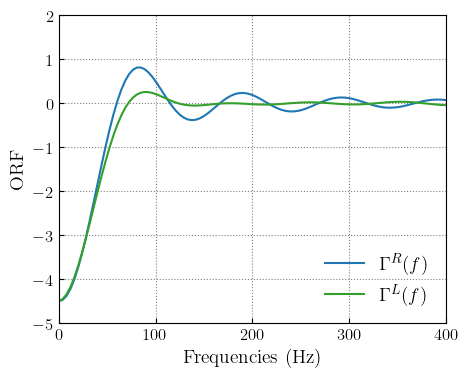

In [245]:
# Construct R/L antenna responses
H1_FRs = H1_Fps + 1j*H1_Fcs
H1_FLs = H1_Fps - 1j*H1_Fcs
L1_FRs = L1_Fps + 1j*L1_Fcs
L1_FLs = L1_Fps - 1j*L1_Fcs

# Manually integrate to compute ORFs
frequencies = np.linspace(0,400,100)
orf_R = np.array([np.sum(H1_FRs*np.conj(L1_FRs)*np.exp(-2.*np.pi*1j*f*delta_x_dot_n/c))*dphi*dcos_theta for f in frequencies])
orf_L = np.array([np.sum(H1_FLs*np.conj(L1_FLs)*np.exp(-2.*np.pi*1j*f*delta_x_dot_n/c))*dphi*dcos_theta for f in frequencies])

# Plot
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(frequencies,np.real(orf_R),label='$\Gamma^R(f)$',color=blue)
ax.plot(frequencies,np.real(orf_L),label='$\Gamma^L(f)$',color=green)
ax.set_xlabel('Frequencies (Hz)')
ax.set_ylabel('ORF')
ax.set_xlim(0,400)
ax.set_ylim(-5,2)
ax.legend(loc='lower right',frameon=False)
plt.show()

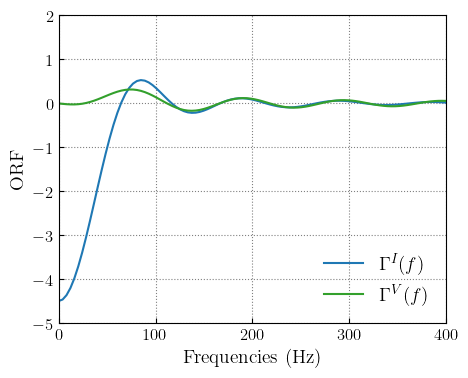

In [246]:
# Again, manually integrate to get I/V ORFs
orf_I = np.array([np.sum((H1_Fps*L1_Fps + H1_Fcs*L1_Fcs)*np.exp(-2.*np.pi*1j*f*delta_x_dot_n/c))*dphi*dcos_theta for f in frequencies])
orf_V = -1j*np.array([np.sum((H1_Fps*L1_Fcs - H1_Fcs*L1_Fps)*np.exp(-2.*np.pi*1j*f*delta_x_dot_n/c))*dphi*dcos_theta for f in frequencies])

# Plot
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(frequencies,np.real(orf_I),label='$\Gamma^I(f)$',color=blue)
ax.plot(frequencies,np.real(orf_V),label='$\Gamma^V(f)$',color=green)
ax.set_xlabel('Frequencies (Hz)')
ax.set_ylabel('ORF')
ax.set_xlim(0,400)
ax.set_ylim(-5,2)
ax.legend(loc='lower right',frameon=False)
plt.show()

Check that the R/L and I/V ORFs obey the algebraic relationships we expect:

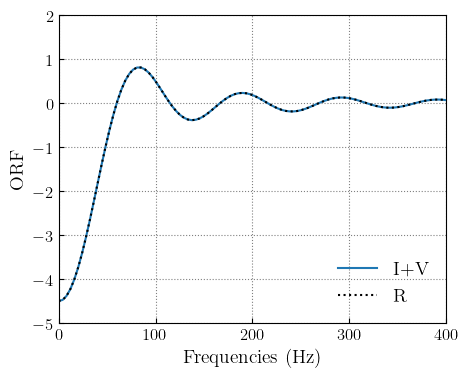

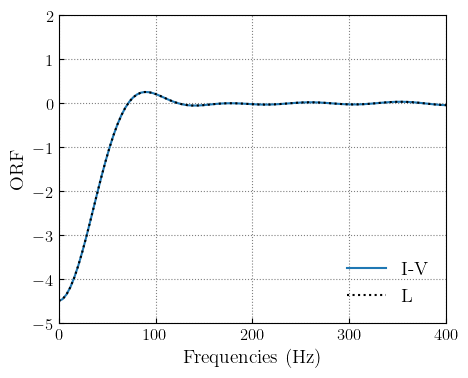

In [253]:
# Plot
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(frequencies,np.real(orf_I+orf_V),color=blue,label='I+V')
ax.plot(frequencies,np.real(orf_R),color='black',ls=':',label='R')
ax.set_xlabel('Frequencies (Hz)')
ax.set_ylabel('ORF')
ax.set_xlim(0,400)
ax.set_ylim(-5,2)
ax.legend(loc='lower right',frameon=False)
plt.show()

# Plot
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(frequencies,np.real(orf_I-orf_V),color=blue,label='I-V')
ax.plot(frequencies,np.real(orf_L),color='black',ls=':',label='L')
ax.set_xlabel('Frequencies (Hz)')
ax.set_ylabel('ORF')
ax.set_xlim(0,400)
ax.set_ylim(-5,2)
ax.legend(loc='lower right',frameon=False)
plt.show()

Now compare to the analytical ORF calculation:

In [254]:
# Parameters in Table 2 of https://arxiv.org/pdf/0801.4185.pdf
beta=27.2*np.pi/180.
delta=45.3*np.pi/180.
Delta=62.2*np.pi/180.

bessel_arg = 4.*np.pi*frequencies*R_earth/c*np.sin(beta/2)
j0 = spherical_jn(0,bessel_arg)
j1 = spherical_jn(1,bessel_arg)
j2 = spherical_jn(2,bessel_arg)
j3 = spherical_jn(3,bessel_arg)
j4 = spherical_jn(4,bessel_arg)

Theta1 = np.cos(beta/2)**4*(j0 + 5.*j2/7. + 3.*j4/112.)
Theta2 = (-3.*j0/8. + 45.*j2/56. - 169.*j4/896.) \
            + (j0/2. - 5.*j2/7. - 27.*j4/224.)*np.cos(beta) \
            + (-j0/8. - 5.*j2/56. - 3.*j4/896.)*np.cos(2.*beta)
Theta3 = -np.sin(beta/2.)*((-j1 + 7.*j3/8.) + (j1 + 3.*j3/8.)*np.cos(beta))

gammaI = Theta1*np.cos(4*delta) + Theta2*np.cos(4*Delta)
gammaV = Theta3*np.sin(4.*Delta)

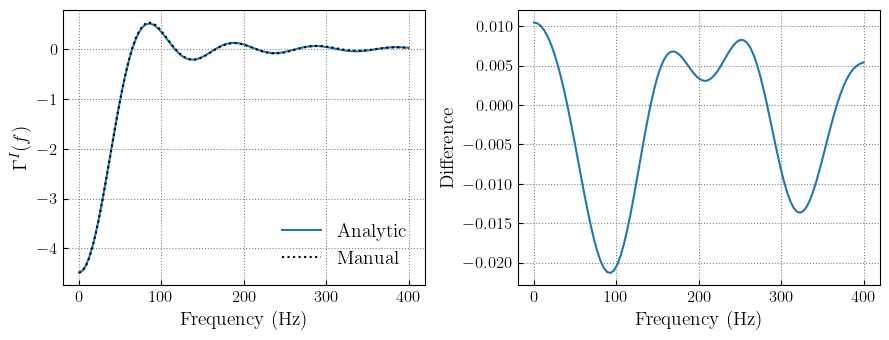

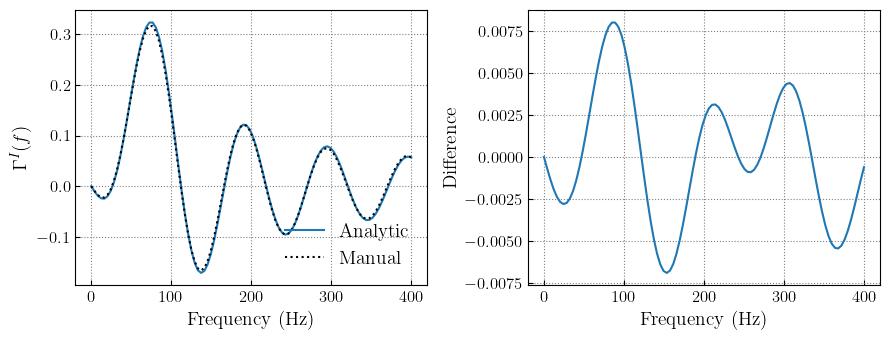

In [257]:
fig = plt.figure(figsize=(9,3.5))
ax = fig.add_subplot(121)
ax.plot(frequencies,gammaI*8.*np.pi/5.,label='Analytic',color=blue)
ax.plot(frequencies,np.real(orf_I),label='Manual',color='black',ls=':')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$\Gamma^I(f)$')
ax.legend(loc='lower right',frameon=False)

ax = fig.add_subplot(122)
ax.plot(frequencies,gammaI*8.*np.pi/5.-np.real(orf_I))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Difference')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(9,3.5))
ax = fig.add_subplot(121)
ax.plot(frequencies,gammaV*8.*np.pi/5.,label='Analytic',color=blue)
ax.plot(frequencies,np.real(orf_V),label='Manual',color='black',ls=':')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$\Gamma^I(f)$')
ax.legend(loc='lower right',frameon=False)

ax = fig.add_subplot(122)
ax.plot(frequencies,gammaV*8.*np.pi/5.-np.real(orf_V))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Difference')
plt.tight_layout()
plt.show()

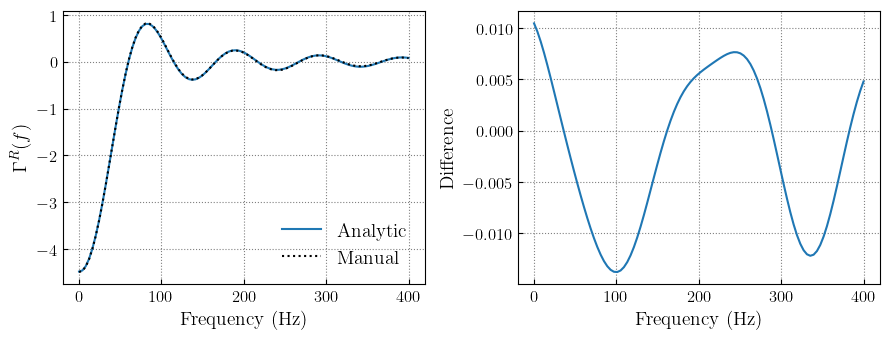

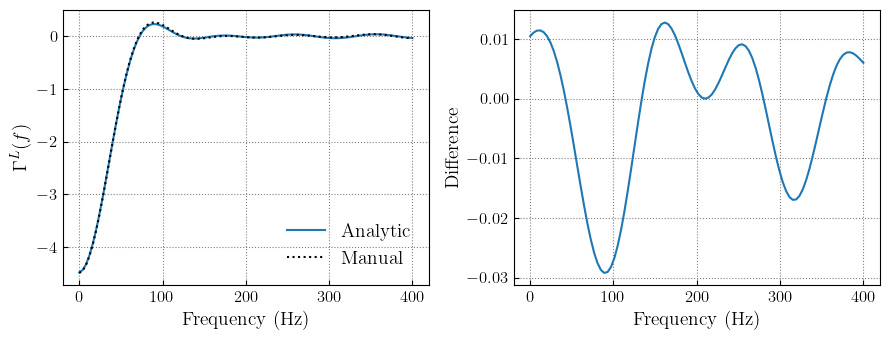

In [259]:
fig = plt.figure(figsize=(9,3.5))
ax = fig.add_subplot(121)
ax.plot(frequencies,(gammaI+gammaV)*8.*np.pi/5.,label='Analytic',color=blue)
ax.plot(frequencies,np.real(orf_R),label='Manual',color='black',ls=':')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$\Gamma^R(f)$')
ax.legend(loc='lower right',frameon=False)

ax = fig.add_subplot(122)
ax.plot(frequencies,(gammaI+gammaV)*8.*np.pi/5.-np.real(orf_R))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Difference')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(9,3.5))
ax = fig.add_subplot(121)
ax.plot(frequencies,(gammaI-gammaV)*8.*np.pi/5.,label='Analytic',color=blue)
ax.plot(frequencies,np.real(orf_L),label='Manual',color='black',ls=':')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$\Gamma^L(f)$')
ax.legend(loc='lower right',frameon=False)

ax = fig.add_subplot(122)
ax.plot(frequencies,(gammaI-gammaV)*8.*np.pi/5.-np.real(orf_L))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Difference')
plt.tight_layout()
plt.show()

In [327]:
r1 = H1.pos()/np.sqrt(H1.pos()@H1.pos())
r2 = L1.pos()/np.sqrt(L1.pos()@L1.pos())

manual_beta = np.arccos(r1@r2)

r1_cross_r2 = np.cross(r1,r2)
r1_cross_r2 /= np.sqrt(r1_cross_r2@r1_cross_r2)
r1_gc = np.cross(r1_cross_r2,r1)
r2_gc = np.cross(r1_cross_r2,r2)

H1_bisector = (H1.xArm()+H1.yArm())/np.sqrt(2)
H1_bisector_a = H1_bisector@r1_gc
H1_bisector_b = H1_bisector@r1_cross_r2
sig1 = np.arctan2(H1_bisector_b,H1_bisector_a)

L1_bisector = (L1.xArm()+L1.yArm())/np.sqrt(2)
L1_bisector_a = L1_bisector@r2_gc
L1_bisector_b = L1_bisector@r1_cross_r2
sig2 = np.arctan2(L1_bisector_b,L1_bisector_a)

manual_Delta = (sig1+sig2)/2
manual_delta = (sig1-sig2)/2

In [328]:
bessel_arg = 4.*np.pi*frequencies*R_earth/c*np.sin(manual_beta/2)
j0 = spherical_jn(0,bessel_arg)
j1 = spherical_jn(1,bessel_arg)
j2 = spherical_jn(2,bessel_arg)
j3 = spherical_jn(3,bessel_arg)
j4 = spherical_jn(4,bessel_arg)

Theta1 = np.cos(manual_beta/2)**4*(j0 + 5.*j2/7. + 3.*j4/112.)
Theta2 = (-3.*j0/8. + 45.*j2/56. - 169.*j4/896.) \
            + (j0/2. - 5.*j2/7. - 27.*j4/224.)*np.cos(manual_beta) \
            + (-j0/8. - 5.*j2/56. - 3.*j4/896.)*np.cos(2.*manual_beta)
Theta3 = -np.sin(manual_beta/2.)*((-j1 + 7.*j3/8.) + (j1 + 3.*j3/8.)*np.cos(manual_beta))

manual_gammaI = Theta1*np.cos(4*manual_delta) + Theta2*np.cos(4*manual_Delta)
manual_gammaV = Theta3*np.sin(4.*manual_Delta)

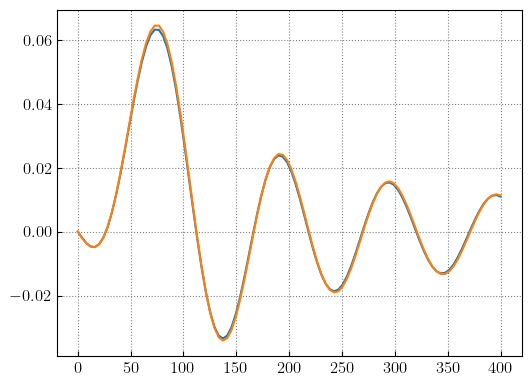

In [331]:
fig,ax = plt.subplots()
ax.plot(frequencies,manual_gammaV)
ax.plot(frequencies,gammaV)